In [ ]:
!pip install ktrain

In [ ]:
import ktrain
from ktrain import text

In [ ]:
DATA_PATH = 'corr_v4.csv'
NUM_WORDS = 50000
MAXLEN = 150
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_csv(DATA_PATH,
                      'Description',
                      label_columns = ["# Neutral", "# Positive", "# Negative"],
                      val_filepath=None, # if None, 10% of data will be used for validation
                      max_features=NUM_WORDS, maxlen=MAXLEN,
                      preprocess_mode='bert')

detected encoding: utf-8 (if wrong, set manually)
['# Neutral', '# Positive', '# Negative']
     # Neutral  # Positive  # Negative
99           1           0           0
46           1           0           0
149          1           0           0
42           0           1           0
36           0           1           0
['# Neutral', '# Positive', '# Negative']
     # Neutral  # Positive  # Negative
124          0           1           0
109          0           0           1
120          0           1           0
144          1           0           0
143          0           1           0
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [ ]:
print(x_train[:3])#x_train.shape, y_train.shape, x_test.shape, y_test.shape)

[array([[  101, 11404, 17712, ...,     0,     0,     0],
       [  101,  7753,  1006, ...,     0,     0,     0],
       [  101,  9422,  1998, ...,     0,     0,     0],
       ...,
       [  101,  2116,  2367, ...,     0,     0,     0],
       [  101,  1999,  2755, ...,     0,     0,     0],
       [  101,  1996,  2740, ...,     0,     0,     0]]), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])]


In [ ]:
text.print_text_classifiers()

fasttext: a fastText-like model [http://arxiv.org/pdf/1607.01759.pdf]
logreg: logistic regression using a trainable Embedding layer
nbsvm: NBSVM model [http://www.aclweb.org/anthology/P12-2018]
bigru: Bidirectional GRU with pretrained fasttext word vectors [https://fasttext.cc/docs/en/crawl-vectors.html]
standard_gru: simple 2-layer GRU with randomly initialized embeddings
bert: Bidirectional Encoder Representations from Transformers (BERT) from keras_bert [https://arxiv.org/abs/1810.04805]
distilbert: distilled, smaller, and faster BERT from Hugging Face transformers [https://arxiv.org/abs/1910.01108]


In [ ]:
model = text.text_classifier('bert', (x_train, y_train), preproc=preproc, multilabel=True)

Is Multi-Label? True
maxlen is 150
done.


In [ ]:
learner = ktrain.get_learner(model, train_data=(x_train, y_train), val_data=(x_test, y_test))

In [ ]:
learner.lr_find()

simulating training for different learning rates... this may take a few moments...


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
/usr/local/lib/python3.7/dist-packages/ktrain/core.py:536: UserWarning: max_epochs is being set to 5 since steps per epoch is small. If you wish to estimate LR using more epochs, set max_epochs manually.
  warnings.warn('max_epochs is being set to 5 since steps per epoch is small. ' +\


Epoch 1/5
5/5 [==============================] - 26s 1s/step - loss: 0.9596 - accuracy: 0.3617
Epoch 2/5
5/5 [==============================] - 5s 1s/step - loss: 0.8494 - accuracy: 0.3617
Epoch 3/5
5/5 [==============================] - 5s 1s/step - loss: 0.6351 - accuracy: 0.4184
Epoch 4/5
5/5 [==============================] - 5s 1s/step - loss: 2.4726 - accuracy: 0.3475
Epoch 5/5
5/5 [==============================] - 5s 1s/step - loss: 21.9866 - accuracy: 0.3688


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


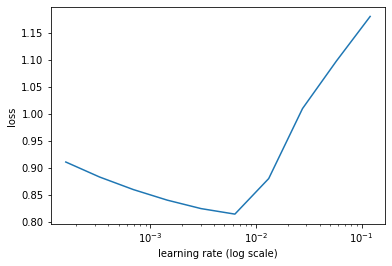

In [ ]:
learner.lr_plot()

In [ ]:
learner.autofit(0.001)

early_stopping automatically enabled at patience=5
reduce_on_plateau automatically enabled at patience=2


begin training using triangular learning rate policy with max lr of 0.001...
Epoch 1/1024
5/5 [==============================] - 26s 2s/step - loss: 0.7297 - accuracy: 0.3759 - val_loss: 0.6459 - val_accuracy: 0.1875
Epoch 2/1024
5/5 [==============================] - 6s 1s/step - loss: 0.6698 - accuracy: 0.3262 - val_loss: 1.1771 - val_accuracy: 0.1875
Epoch 3/1024
5/5 [==============================] - 6s 1s/step - loss: 0.6836 - accuracy: 0.4255 - val_loss: 0.6469 - val_accuracy: 0.1875

Epoch 00003: Reducing Max LR on Plateau: new max lr will be 0.0005 (if not early_stopping).
Epoch 4/1024
5/5 [==============================] - 6s 1s/step - loss: 0.6585 - accuracy: 0.3759 - val_loss: 0.6154 - val_accuracy: 0.5625
Epoch 5/1024
5/5 [==============================] - 6s 1s/step - loss: 0.6425 - accuracy: 0.4610 - val_loss: 0.8194 - val_accuracy: 0.1875
Epoch 6/1024
5/5 [=========

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [ ]:
data = [ 'The major conclusion of these studies is that house prices depend positively on income per capita, wealth and population growth.']

In [ ]:
predictor.predict(data)

[[('# Neutral', 0.29872268),
  ('# Positive', 0.59985924),
  ('# Negative', 0.22054927)]]